# Testing: Ensuring colours for years match between HDC chart and others

In [2]:
##Importing libaries
import plotly.graph_objs as go  # Offline plotting
import plotly.io as pio
import pandas as pd
import datetime
import textwrap

In [3]:
##Loading and setting templates
pio.templates
prt_template = go.layout.Template(
    layout=go.Layout(
        title_font=dict(family="Helvetica Neue, Arial", size=17),
        font_color="#54565B",
        font_family="Helvetica Neue, Arial",
        font_size=12,
        paper_bgcolor="#FBFAF7",
        plot_bgcolor="#FBFAF7",
        colorway=("#A01D28", "#499CC9", "#F9A237", "#6FBA3A", "#573D6B"),
    )
)

config = dict(
    {
        "scrollZoom": False,
        "displayModeBar": False,
        "editable": False,
        "displaylogo": False,
        "showAxisDragHandles": False,
    }
)

In [4]:
##Reading in data
df = pd.read_csv(
    "../Data/HDC.csv", usecols=["date", "hdc_pop"], parse_dates=["date"], thousands=","
)

In [5]:
df

date  hdc_pop
0   2020-01-03   2759.0
1   2020-01-10   2726.0
2   2020-01-17   2741.0
3   2020-01-24   2703.0
4   2020-01-31   2698.0
..         ...      ...
129 2022-07-22   2138.0
130 2022-07-29   2140.0
131 2022-08-05   2141.0
132 2022-08-12   2139.0
133 2022-08-19   2121.0

[134 rows x 2 columns]

In [6]:
##Filtering year range
year = "2020"
mask = df["date"].dt.year >= int(year)
df_include = df[mask]

In [7]:
##Calculating xaxis_tickvals
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 12, 31)

xtick_vals = pd.date_range(start, end)
filt = xtick_vals.is_month_start

month_weeks = xtick_vals[filt].isocalendar().week
month_weeks[0] = 1  # preventing week 1 from starting at the end of previous year

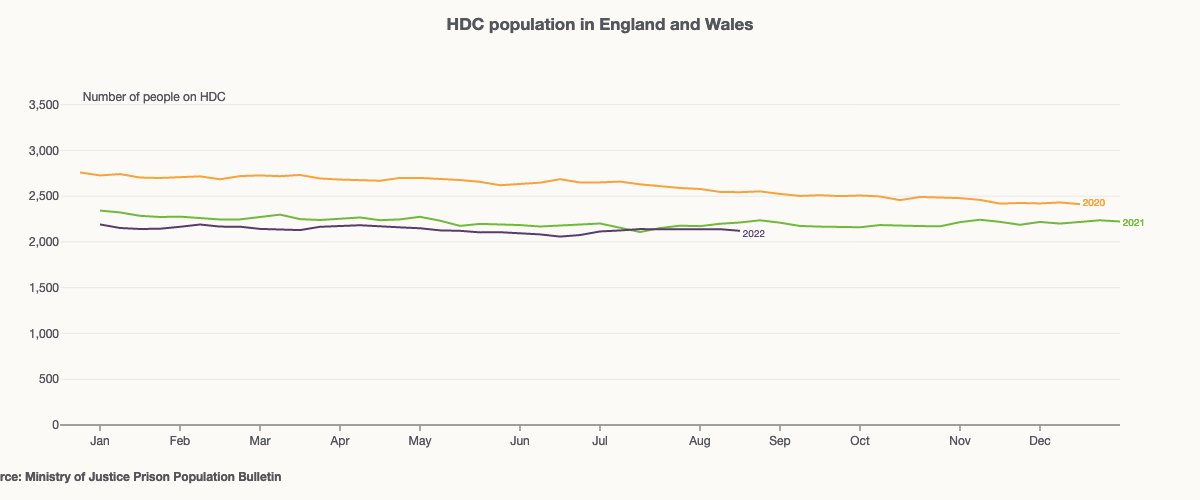

In [19]:
## Chart title
title = textwrap.wrap("<b>HDC population in England and Wales</b>", width=65)

##Plotting

fig = go.Figure()

trace_list = []
for year in df_include["date"].dt.year.unique():
    df_year = df_include[df_include["date"].dt.year == year]

    trace = go.Scatter(
        x=df_year["date"].dt.strftime("Week %U"),
        y=df_year["hdc_pop"],
        mode="lines",
        connectgaps=True,
        hovertext=df["date"].dt.strftime(" "),
        hovertemplate="<b>%{hovertext}</b><br>" + "%{y:,.0f}",
        name=str(year),
    )

    trace_list.append(trace)

fig.add_traces(trace_list)

##Automatically adjust the colours used from the template based on the length of the trace list
prt_template.layout.colorway = prt_template.layout.colorway[-len(trace_list):]


##Edit the layout

fig.update_layout(
    margin=dict(l=60, b=75),
    title="<br>".join(title),
    title_y=0.94,
    title_yanchor="bottom",
    yaxis_title="",
    yaxis_tickformat=",.0f",
    xaxis_showgrid=False,
    xaxis_tickvals=month_weeks,
    xaxis_ticktext=xtick_vals[filt].strftime("%b"),
    xaxis_tickcolor="#54565B",
    template=prt_template,
    showlegend=False,
    hovermode="x unified",
    modebar_activecolor="#A12833",
    width=655,
    height=500,
)

## Chart annotations
annotations = []

y_list = [0, -25, -45, 0, 0]

# Adding trace annotations
for i in range(0, len(trace_list)):
    annotations.append(
        dict(
            xref="x",
            yref="y",
            x=trace_list[i].x[-1],
            y=trace_list[i].y[-2] + y_list[i],
            text=str(trace_list[i].name),
            xanchor="left",
            align="left",
            showarrow=False,
            font_color=prt_template.layout.colorway[i],
            font_size=10,
        )
    )

# Adding source label
annotations.append(
    dict(
        xref="paper",
        yref="paper",
        x=-0.08,
        y=-0.19,
        align="left",
        showarrow=False,
        text="<b>Source: Ministry of Justice Prison Population Bulletin</b>",
        font_size=12,
    )
)

# Adding y-axis label
annotations.append(
    dict(
        xref="x",
        yref="paper",
        x="Week 00",
        y=1.04,
        align="left",
        xanchor="left",
        showarrow=False,
        text="Number of people on HDC",
        font_size=12,
    )
)

# Adding annotations to layout
fig.update_layout(annotations=annotations)

fig.update_yaxes(range=[0, 3550], nticks=10)
fig.update_xaxes(range=[-1, 52])

##Plot file offline
fig.show(config=config)

Testing some logic to automatically adjust the colours used based on the length of the trace list

In [10]:
prt_template.layout.colorway

('#A01D28', '#499CC9', '#F9A237', '#6FBA3A', '#573D6B')

In [11]:
len(trace_list)

3

In [13]:
prt_template.layout.colorway[-3:]

('#F9A237', '#6FBA3A', '#573D6B')

In [14]:
prt_template.layout.colorway[-len(trace_list):]

('#F9A237', '#6FBA3A', '#573D6B')

In [17]:
prt_template.layout.colorway[-60:]

('#A01D28', '#499CC9', '#F9A237', '#6FBA3A', '#573D6B')